<a href="https://colab.research.google.com/github/Rodrigues383/Edools/blob/master/ppd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#conectar ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#importação das libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.express as px
from plotly import graph_objects as go

from ipywidgets import widgets
from IPython.display import display


In [ ]:
#Aqui esta os arquivos apontados para o meu drive(Marcos)
df_porEstado = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_ESTADO.csv',sep=';')
df_porIdade = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_IDADE.csv',sep=';')
df_porRaca = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RACA.csv',sep=';')
df_porRenda = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RENDA.csv',sep=';')
df_porSexo = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_SEXO.csv',sep=';')
df_porSexoXRaca = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RENDA_X_RACA.csv',sep=';')
df_porSexoXRaca2 = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RENDA_X_RACA2.csv',sep=';')


#Para não perder, vcs podem descomentar esse trecho e apontar para o drive de vcs aqui e comentar o trecho de cima.
#df_porEstado = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_ESTADO.csv',sep=';')
#df_porIdade = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_IDADE.csv',sep=';')
#df_porRaca = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RACA.csv',sep=';')
#df_porRenda = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_RENDA.csv',sep=';')
#df_porSexo = pd.read_csv('/content/drive/MyDrive/PPD/PROJETO_PPD/ENEM_SEXO.csv',sep=';')


In [ ]:

##########################################################
#   AQUI CaRREGO AS INFORMAÇÔES A SEREM USADAS NO GRAFICO
##########################################################
#seprarando dataframe por estado para plotar os graficos com informações de cada estado
df_EstadoAL = df_porEstado[df_porEstado['SG_UF_RESIDENCIA']=='AL']
df_EstadoRJ = df_porEstado[df_porEstado['SG_UF_RESIDENCIA']=='RJ']

#inicializando as variaveis(arrays) que guardaram as informações apresentadas o grafico
x1 = []
y1 = []
x2 = []
y2 = []

#percorrendo o dataframe de alagoas(linha a linha) e pegando as informações que quero apresentar o grafico, no caso NU_ANO e PERCENT_INSCRITOS
#a cada linha do data frame foi adicionado o ANO a variavel X e o percentual a variavel Y, depois adiciono o conteudo de X no array x1 e o conteudo de Y no array y1
for index, row in df_EstadoAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    X= row['NU_ANO']
    Y= row['PERCENT_INSCRITOS']
    x1.append(X)
    y1.append(Y)
#a mesma coisa de antes, mas para o dataframe do RJ e com os arrays x2 e y2
for index, row in df_EstadoRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    X= row['NU_ANO']
    Y= row['PERCENT_INSCRITOS']
    x2.append(X)
    y2.append(Y)    



In [ ]:
# 1. Qual o percentual de inscritos, no ENEM, ao longo dos anos?


##########################################################
#   Comparação do total de Inscritos no ENEM nos Estados de Al e RJ, nos anos de 1999, 2009 e 2019
##########################################################
df_EstadoAL = df_porEstado[df_porEstado['SG_UF_RESIDENCIA']=='AL']
df_EstadoRJ = df_porEstado[df_porEstado['SG_UF_RESIDENCIA']=='RJ']

x1 = []
y1 = []
x2 = []
y2 = []

for index, row in df_EstadoAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    X= row['NU_ANO']
    Y= row['PERCENT_INSCRITOS']
    x1.append(X)
    y1.append(Y)
for index, row in df_EstadoRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    X= row['NU_ANO']
    Y= row['PERCENT_INSCRITOS']
    x2.append(X)
    y2.append(Y)    

out = widgets.Output(layout={"color":"red", 'border': '2px solid blue', 'font-size': '10%'})

display(out)
with(out):
    print("Comparação do total de Inscritos no ENEM nos Estados de Al e RJ, nos anos de 1999, 2009 e 2019")
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'AL',
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    x = y1,
    opacity = 0.90, marker = {"color": ["#2515F5", "#3525F5", "#4535F5"]},
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'RJ',
    orientation = "h",
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    x = y2,
    opacity = 0.90, marker = {"color": ["#CB1F64", "#CB2F64", "#CB3F64"]},
    textposition = "inside",
    textinfo = "value+percent previous")
)
fig.show()


Output(layout=Layout(border='2px solid blue'))

# Mapa da renda famiiiar de Inscritos no ENEM nos Estados de Al e RJ, nos anos de 1999, 2009 e 2019

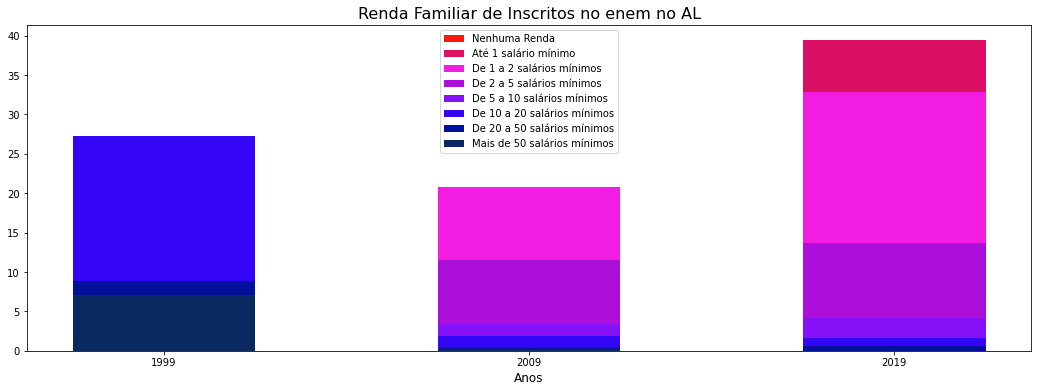

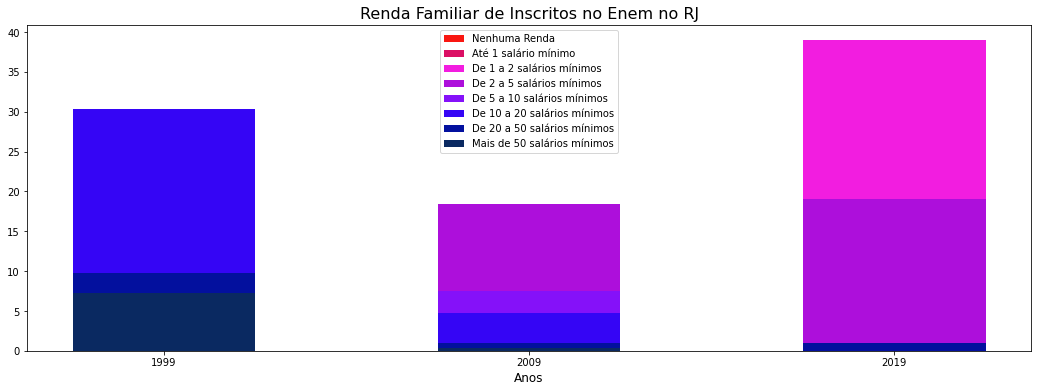

In [ ]:

##########################################################
#   Renda Familiar de Inscritos no enem
##########################################################
df_RendaAL = df_porRenda[(df_porRenda['SG_UF_RESIDENCIA']=='AL') ]
df_RendaRJ = df_porRenda[(df_porRenda['SG_UF_RESIDENCIA']=='RJ') ]
x0 = [] 
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x9 = []
y0 = [] 
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y9 = []
renda0=0
renda1=0
renda2=0
renda3=0
renda4=0
renda5=0
renda6=0
renda7=0
renda9=0

for index, row in df_RendaAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'], row['Renda_Familiar'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    ano= row['NU_ANO']
    if(row['Renda_Familiar'] == 0):
      renda0 = row['PERCENT_INSCRITOS']
      x0.append(renda0)
    elif(row['Renda_Familiar'] == 1):
      renda1 = row['PERCENT_INSCRITOS']
      x1.append(renda1)
    elif(row['Renda_Familiar'] == 2):
      renda2 = row['PERCENT_INSCRITOS']
      x2.append(renda2)
    elif(row['Renda_Familiar'] == 3):
      renda3 = row['PERCENT_INSCRITOS']
      x3.append(renda3)
    elif(row['Renda_Familiar'] == 4):
      renda4 = row['PERCENT_INSCRITOS']
      x4.append(renda4)
    elif(row['Renda_Familiar'] == 5):
      renda5 = row['PERCENT_INSCRITOS']
      x5.append(renda5)
    elif(row['Renda_Familiar'] == 6):
      renda6 = row['PERCENT_INSCRITOS']
      x6.append(renda6)
    elif(row['Renda_Familiar'] == 7):
      renda7 = row['PERCENT_INSCRITOS']
      x7.append(renda7)
    elif(row['Renda_Familiar'] == 9):
      renda9 = row['PERCENT_INSCRITOS']
      x9.append(renda9)    
x7.append(0)
x9.append(0.57)
for index, row in df_RendaRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'], row['Renda_Familiar'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    ano= row['NU_ANO']
    if(row['Renda_Familiar'] == 0):
      renda0 = row['PERCENT_INSCRITOS']
      y0.append(renda0)
    elif(row['Renda_Familiar'] == 1):
      renda1 = row['PERCENT_INSCRITOS']
      y1.append(renda1)
    elif(row['Renda_Familiar'] == 2):
      renda2 = row['PERCENT_INSCRITOS']
      y2.append(renda2)
    elif(row['Renda_Familiar'] == 3):
      renda3 = row['PERCENT_INSCRITOS']
      y3.append(renda3)
    elif(row['Renda_Familiar'] == 4):
      renda4 = row['PERCENT_INSCRITOS']
      y4.append(renda4)
    elif(row['Renda_Familiar'] == 5):
      renda5 = row['PERCENT_INSCRITOS']
      y5.append(renda5)
    elif(row['Renda_Familiar'] == 6):
      renda6 = row['PERCENT_INSCRITOS']
      y6.append(renda6)
    elif(row['Renda_Familiar'] == 7):
      renda7 = row['PERCENT_INSCRITOS']
      y7.append(renda7)
    elif(row['Renda_Familiar'] == 9):
      renda9 = row['PERCENT_INSCRITOS']
      y9.append(renda9)    

y4.append(0)
y5.append(0)
y7.append(0)
y9.append(0)

##########################################################
#   AQUI COMEÇO A CONFIGURAR E MONTAR O GRAFICO DE BARRAS
##########################################################
percent_AL = x1
percent_RJ = x2

larguraBarras = 0.5

plt.figure(figsize=(18,6))

r1 = np.arange(len([1999,2009,2019]))+larguraBarras
r2 = np.arange(len([1999,2009,2019]))+larguraBarras


plt.bar(r2, x0, color='#F91711', width=larguraBarras, label='Nenhuma Renda')
plt.bar(r2, x1, color='#DB0F64', width=larguraBarras, label='Até 1 salário mínimo')
plt.bar(r2, x2, color='#F21DE0', width=larguraBarras, label='De 1 a 2 salários mínimos')
plt.bar(r2, x3, color='#AD0FDB', width=larguraBarras, label='De 2 a 5 salários mínimos')
plt.bar(r2, x4, color='#8511F9', width=larguraBarras, label='De 5 a 10 salários mínimos')
plt.bar(r2, x5, color='#3505F5', width=larguraBarras, label='De 10 a 20 salários mínimos')
plt.bar(r2, x6, color='#03109E', width=larguraBarras, label='De 20 a 50 salários mínimos')
plt.bar(r2, x7, color='#0A2961', width=larguraBarras, label='Mais de 50 salários mínimos')
#plt.bar(r2, x9, color='#2EF549', width=larguraBarras, label='Não informado')

plt.xlabel('Percentual',fontsize=12)
plt.xticks([r + larguraBarras for r in range(len([1999,2009,2019]))], ['1999','2009','2019'])
plt.xlabel('Anos',fontsize=12)
plt.title("Renda Familiar de Inscritos no enem no AL",fontsize=16)

plt.legend()
plt.show()

##########################################################
#   AQUI COMEÇO A CONFIGURAR E MONTAR O GRAFICO DE BARRAS
##########################################################
percent_AL = x1
percent_RJ = x2

larguraBarras = 0.5

plt.figure(figsize=(18,6))

r1 = np.arange(len([1999,2009,2019]))+larguraBarras
r2 = np.arange(len([1999,2009,2019]))+larguraBarras


plt.bar(r2, y0, color='#F91711', width=larguraBarras, label='Nenhuma Renda')
plt.bar(r2, y1, color='#DB0F64', width=larguraBarras, label='Até 1 salário mínimo')
plt.bar(r2, y2, color='#F21DE0', width=larguraBarras, label='De 1 a 2 salários mínimos')
plt.bar(r2, y3, color='#AD0FDB', width=larguraBarras, label='De 2 a 5 salários mínimos')
plt.bar(r2, y4, color='#8511F9', width=larguraBarras, label='De 5 a 10 salários mínimos')
plt.bar(r2, y5, color='#3505F5', width=larguraBarras, label='De 10 a 20 salários mínimos')
plt.bar(r2, y6, color='#03109E', width=larguraBarras, label='De 20 a 50 salários mínimos')
plt.bar(r2, y7, color='#0A2961', width=larguraBarras, label='Mais de 50 salários mínimos')
#plt.bar(r2, y9, color='#2EF549', width=larguraBarras, label='Não informado')



#Aqui é a cofiguração dos labels e titulo
plt.xlabel('Percentual',fontsize=12)
plt.xticks([r + larguraBarras for r in range(len([1999,2009,2019]))], ['1999','2009','2019'])
plt.xlabel('Anos',fontsize=12)
plt.title("Renda Familiar de Inscritos no Enem no RJ",fontsize=16)

#exibindo o grafico e a legenda
plt.legend()
plt.show()

# 2. Comparação do total de Inscritos no ENEM nos Estados de Al e RJ com renda familiar de até 3 salários minimos, nos anos de 1999, 2009 e 2019


In [ ]:


df_RendaAL = df_porRenda[(df_porRenda['SG_UF_RESIDENCIA']=='AL') & (df_porRenda['Renda_Familiar'] <= 3) & (df_porRenda['Renda_Familiar'] > 0)]
df_RendaRJ = df_porRenda[(df_porRenda['SG_UF_RESIDENCIA']=='RJ') & (df_porRenda['Renda_Familiar'] <= 3) & (df_porRenda['Renda_Familiar'] > 0)]

df_RendaAL = df_RendaAL.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})
df_RendaRJ = df_RendaRJ.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})

y1 = []
y2 = []

for index, row in df_RendaAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    Y= row['PERCENT_INSCRITOS']
    y1.append(Y)

for index, row in df_RendaRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    Y= row['PERCENT_INSCRITOS']
    y2.append(Y)    

out = widgets.Output(layout={"color":"red", 'border': '2px solid blue', 'font-size': '10%'})

display(out)
with(out):
    print("Comparação do total de Inscritos no ENEM nos Estados de Al e RJ com renda familiar de até 3 salários minimos, nos anos de 1999, 2009 e 2019")

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'AL',
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    
    opacity = 0.90, marker = {"color": ["#DB0F64", "#F21DE0", "#AD0FDB"]},
    x = y1,
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'RJ',
    orientation = "h",
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    
    opacity = 0.90, marker = {"color": ["#8511F9", "#3505F5", "#03109E"]},
    x = y2,
    textposition = "inside",
    textinfo = "value+percent previous")
)

fig.show()



Output(layout=Layout(border='2px solid blue'))

print(df_RendaRJ)# 3. Qual o percentual de inscritos, no ENEM, ao longo dos anos, que se consideram negros ou pardos?

In [ ]:


df_RendaAL = df_porRaca[(df_porRaca['SG_UF_RESIDENCIA']=='AL') & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)]
df_RendaRJ = df_porRaca[(df_porRaca['SG_UF_RESIDENCIA']=='RJ') & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)]

df_RendaAL = df_RendaAL.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})
df_RendaRJ = df_RendaRJ.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})

df_RendaAL2 = df_porRaca[(df_porRaca['SG_UF_RESIDENCIA']=='AL') & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)]
df_RendaRJ2 = df_porRaca[(df_porRaca['SG_UF_RESIDENCIA']=='RJ') & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)]

df_RendaAL2 = df_RendaAL2.groupby('NU_ANO').agg({'QTD_INSCRITOS':  'sum'})
df_RendaRJ2 = df_RendaRJ2.groupby('NU_ANO').agg({'QTD_INSCRITOS':  'sum'})

y1 = []
y2 = []
x1 = []
x2 = []
for index, row in df_RendaAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    Y= row['PERCENT_INSCRITOS']
    y1.append(Y)
for index, row in df_RendaRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    Y= row['PERCENT_INSCRITOS']
    y2.append(Y)   

for index, row in df_RendaAL2.iterrows():
#    print(row['QTD_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    X= row['QTD_INSCRITOS']
    x1.append(X)
    

for index, row in df_RendaRJ2.iterrows():
#    print( row['QTD_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    X= row['QTD_INSCRITOS']
    x2.append(X)
    

out = widgets.Output(layout={"color":"red", 'border': '2px solid blue', 'font-size': '10%'})
display(out)
with(out):
    print("Progressão percentual de inscritos, nos anos de 1999, 2009 e 2019, que se consideram negros ou pardos")

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'AL',
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    opacity = 0.90, marker = {"color": ["#DB0F64", "#F21DE0", "#AD0FDB"]},
    x = y1,
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'RJ',
    orientation = "h",
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    opacity = 0.90, marker = {"color": ["#8511F9", "#3505F5", "#03109E"]},
    x = y2,
    textposition = "inside",
    textinfo = "value+percent previous")
)

fig.show()



out = widgets.Output(layout={"color":"red", 'border': '2px solid blue', 'font-size': '10%'})
display(out)
with(out):
    print("Progressão quantitativa de inscritos, nos anos de 1999, 2009 e 2019, que se consideram negros ou pardos")

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'AL',
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    opacity = 0.90, marker = {"color": ["#DB2F64", "#F23DE0", "#AD3FDB"]},
    x = x1,
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'RJ',
    orientation = "h",
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    opacity = 0.90, marker = {"color": ["#8531F9", "#3525F5", "#03309E"]},
    x = x2,
    textposition = "inside",
    textinfo = "value+percent previous")
)

fig.show()

Output(layout=Layout(border='2px solid blue'))

Output(layout=Layout(border='2px solid blue'))

# ad

In [ ]:
f_RendaAL = df_porSexoXRaca[((df_porSexoXRaca['Renda_Familiar'] <= 3) & (df_porSexoXRaca['Renda_Familiar'] > 0)) & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)]
df_RendaRJ = df_porSexoXRaca[((df_porSexoXRaca['Renda_Familiar'] <= 3) & (df_porSexoXRaca['Renda_Familiar'] > 0)) & ((df_porRaca['TP_COR_RACA'] == 2) | (df_porRaca['TP_COR_RACA'] == 3)) & (df_porRaca['TP_COR_RACA'] > 0)] 
df_RendaAL = df_porSexoXRaca2[(df_porSexoXRaca2['SG_UF_RESIDENCIA']=='AL')]
df_RendaRJ = df_porSexoXRaca2[(df_porSexoXRaca2['SG_UF_RESIDENCIA']=='RJ')]

df_RendaAL = df_RendaAL.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})
df_RendaRJ = df_RendaRJ.groupby('NU_ANO').agg({'PERCENT_INSCRITOS':  'sum'})


df_porSexoXRaca2


y1 = []
y2 = []

for index, row in df_RendaAL.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste 
    Y= row['PERCENT_INSCRITOS']
    y1.append(Y)

for index, row in df_RendaRJ.iterrows():
#    print(row['SG_UF_RESIDENCIA'], row['NU_ANO'], row['PERCENT_INSCRITOS'])  # essa linha pode ser comentada, é apenas para imprimir os valores antes do grafico, usei para teste
    Y= row['PERCENT_INSCRITOS']
    y2.append(Y)    

out = widgets.Output(layout={"color":"red", 'border': '2px solid blue', 'font-size': '10%'})

display(out)
with(out):
    print("Correlação de baixa renda e que se consideram negros ou pardos" )

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'AL',
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    
    opacity = 0.90, marker = {"color": ["#DB0F64", "#F21DE0", "#AD0FDB"]},
    x = y1,
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'RJ',
    orientation = "h",
    y = ["Enem-1999", "Enem-2009", "Enem-2019"],
    
    opacity = 0.90, marker = {"color": ["#8511F9", "#3505F5", "#03109E"]},
    x = y2,
    textposition = "inside",
    textinfo = "value+percent previous")
)

fig.show()




Output(layout=Layout(border='2px solid blue'))